In [1]:
import pandas as pd
import matplotlib.pyplot as plt

19


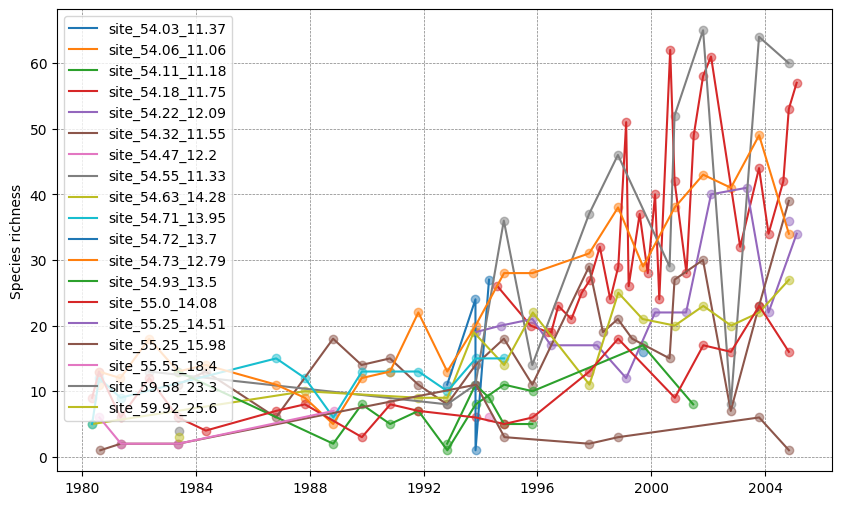

In [2]:
data = pd.read_csv("data/sps_macrozoobenthos_timeseries.csv", header=0, index_col=0)
# Turn MMDDYYYY into a datetime object
data['date'] = pd.to_datetime(data['MMDDYYY'], format='%m-%d-%Y')


# Calculate species richness over time
species_richness = data.groupby(['site', 'date'])['scientificnameaccepted'].nunique()
species_richness = species_richness.reset_index().rename({'scientificnameaccepted': 'species_richness'}, axis=1)
species_richness

# Plot out species richness over time
plt.figure(figsize=(10, 6))
for site in species_richness['site'].unique():
    site_data = species_richness[species_richness['site'] == site]
    plt.plot(site_data['date'], site_data['species_richness'], label=site)
    plt.scatter(site_data['date'], site_data['species_richness'], alpha=0.5)
    # add background grid
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
# plt.xlabel('Year')
plt.ylabel('Species richness')
print(data["site"].nunique())

In [3]:
print(data["site"].nunique())

19


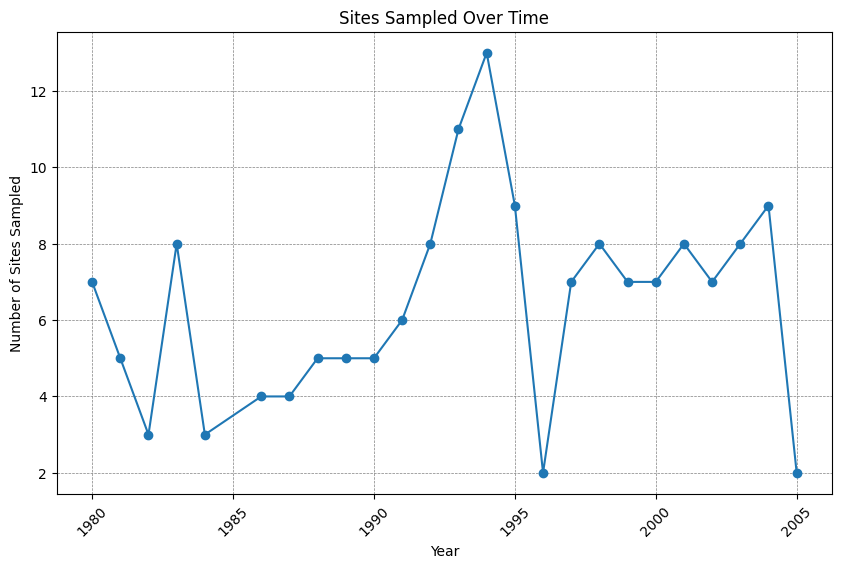

In [4]:
# Group by date and count the number of sites sampled
sites_per_date = data.groupby("date")["site"].count()

# Aggregate per year
data["year"] = data["date"].dt.year
sites_per_year  = data.groupby("year")["site"].nunique()
# Sort the index (which is now a datetime index)
sites_per_year = sites_per_year.sort_index()
sites_per_date
# # Plot the number of sites sampled over time
plt.figure(figsize=(10, 6))
plt.plot(sites_per_year.index, sites_per_year.values, marker="o", linestyle="-")

# # Formatting the plot
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.ylabel("Number of Sites Sampled")
plt.xlabel("Year")
plt.title("Sites Sampled Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

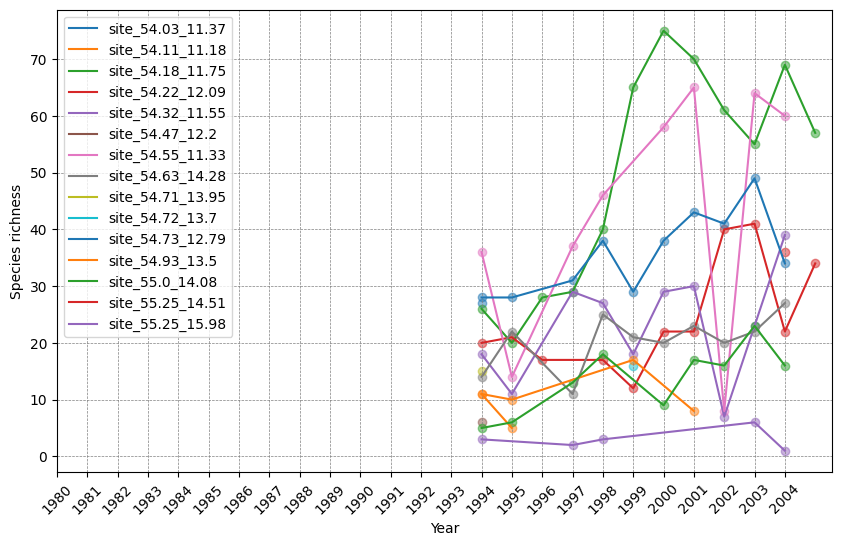

In [5]:
# Extract number of years each site has been sampled
site_years = data.groupby("site")["year"].nunique()

# Most sampled sites
# print(site_years.sort_values(ascending=False)[:10].index)

# 
# data1 = data[data["site"].isin(site_years[site_years > 11].index)]

# Calculate species richness over time
species_richness = data.groupby(['site', 'year'])['scientificnameaccepted'].nunique()

species_richness = species_richness.reset_index().rename({'scientificnameaccepted': 'species_richness'}, axis=1)
species_richness = species_richness[species_richness['year'] >=1994]
# species_richness

# Plot out species richness over time
plt.figure(figsize=(10, 6))
for site in species_richness['site'].unique():
    site_data = species_richness[species_richness['site'] == site]
    plt.plot(site_data['year'], site_data['species_richness'], label=site)
    plt.scatter(site_data['year'], site_data['species_richness'], alpha=0.5)
    # add background grid
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.xlabel('Year')
plt.xticks(range(1980, 2005), range(1980, 2005), rotation=45)
plt.ylabel('Species richness')
plt.show()

# Write out dataset
# data.to_csv("data/sps_macrozoobenthos_year_10.csv", index=False)

### Extract longitude, lattitude from the data


In [6]:
# !pip install geopandas

In [7]:
data["longitude"] = data["site"].str.split("_").str[-2].str.extract(r"(\d+\.\d+)").astype("float")

data["latitude"] = data["site"].str.split("_").str[-1].str.extract(r"(\d+\.\d+)").astype("float")

# Round to 1 decimal place
data["longitude"] = data["longitude"].apply(lambda x: round(x, 1))
data["latitude"] = data["latitude"].apply(lambda x: round(x, 1))



In [8]:
# !pip install cartopy
# !pip install geoviews

data
# 
geoplot = data[data["year"]==2003].groupby(["longitude", "latitude","site"])["scientificnameaccepted"].nunique().sort_values(ascending=False).reset_index()


In [9]:
geoplot

,longitude,latitude,site,scientificnameaccepted
0,54.5,11.3,site_54.55_11.33,64
1,54.2,11.8,site_54.18_11.75,55
2,54.7,12.8,site_54.73_12.79,49
3,54.2,12.1,site_54.22_12.09,41
4,54.3,11.6,site_54.32_11.55,23
5,55.0,14.1,site_55.0_14.08,23
6,54.6,14.3,site_54.63_14.28,22
7,55.2,16.0,site_55.25_15.98,6


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
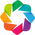

:Overlay
   .Points.I    :Points   [longitude,latitude]   (site,scientificnameaccepted)
   .Labels.I    :Labels   [longitude,latitude]   (site,scientificnameaccepted)
   .Coastline.I :Feature   [Longitude,Latitude]
   .WMTS.I      :WMTS   [Longitude,Latitude]

In [10]:
import geopandas as gpd
import geodatasets as gds
from cartopy import crs
import geoviews as gv
import geoviews as gv
import geoviews.feature as gf
# import xarray as xr
from cartopy import crs

gv.extension('bokeh', 'matplotlib')
# Display the ocean map of by longitude and latitude
# gv.tile_sources.OSM * gv.Points(data, ['longitude', 'latitude']).opts(height=500, width=500, tools=["hover"])
# Display the points size by the number of species
# gv.tile_sources.OSM * gv.Points(data, ['longitude', 'latitude'], ['species_richness']).opts(height=500, width=500, tools=["hover"])
points = gv.Points(geoplot, ['longitude', 'latitude']).opts(height=600, width=600, tools=["hover"]) 
(points.opts(
    size=gv.dim('scientificnameaccepted')*0.5, 
    line_color='gray', 
    width=700, height=700, tools=['hover'], show_legend=False) *
 gv.Labels(points).opts(text_font_size='6pt', text_color='white') * gf.coastline * gv.tile_sources.OSM )


In [11]:


geoplot = data.groupby(["longitude", "latitude","site"])["scientificnameaccepted"].nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.scatter(geoplot.index.get_level_values("latitude"), \
    geoplot.index.get_level_values("longitude"), s=geoplot.values*100, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
# Add ocean basemap
# plt.imshow(plt.imread("data/ocean_basemap.png"), extent=[-180, 180, -90, 90])
plt.show()


C:\Users\ttran\AppData\Local\Temp\ipykernel_22592\2827520015.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


# Load environmental data

In [2]:
import pandas as pd
ices = pd.read_csv("data/ices_data3_cleaned.csv", header=0)

In [4]:
ices.columns

Index(['Latitude [degrees_north]', 'Longitude [degrees_east]', 'year',
       'Bot. Depth [m]', 'Secchi Depth [m]', 'Depth (ADEPZZ01_ULAA) [m]',
       'Temperature (TEMPPR01_UPAA) [degC]',
       'Salinity (PSALPR01_UUUU) [dmnless]', 'Oxygen (DOXYZZXX_UMLL) [ml/l]',
       'Phosphate (PHOSZZXX_UPOX) [umol/l]',
       'Total Phosphorus (TPHSZZXX_UPOX) [umol/l]',
       'Silicate (SLCAZZXX_UPOX) [umol/l]',
       'Nitrate + Nitrite (NTRZZZXX_UPOX) [umol/l]',
       'Nitrate (NTRAZZXX_UPOX) [umol/l]', 'Nitrite (NTRIZZXX_UPOX) [umol/l]',
       'Ammonium (AMONZZXX_UPOX) [umol/l]',
       'Total Nitrogen (NTOTZZXX_UPOX) [umol/l]',
       'Hydrogen SulphIDe (H2SXZZXX_UPOX) [umol/l]',
       'pH (PHXXZZXX_UUPH) [pH units]',
       'Total Alkalinity (ALKYZZXX_MEQL) [mEq/l]',
       'Chlorophyll a (CPHLZZXX_UGPL) [ug/l]', 'yyyy-mm-dd'],
      dtype='object')

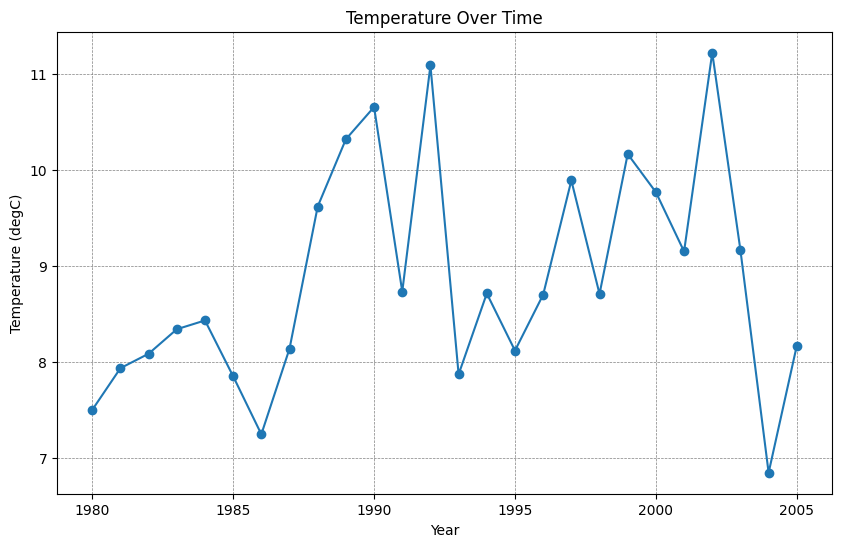

In [11]:
# Plot the temperature over time (grouped by year)
plot_temp =  ices.groupby('year')['Temperature (TEMPPR01_UPAA) [degC]'].mean().reset_index()
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(plot_temp['year'], plot_temp ['Temperature (TEMPPR01_UPAA) [degC]'], marker='o', linestyle='-')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Year')
plt.ylabel('Temperature (degC)')
plt.title('Temperature Over Time')
plt.show()


In [15]:
# sorted(ctd_data["Longitude"].unique())

# data

# Calculate richness estimators over year
chao1 and chao2

In [16]:
# chao1 species richness
def chao1(data, year):
    data_year = data[data['year'] == year]
    species_richness = data_year.groupby('site')['scientificnameaccepted'].nunique()
    singletons_count = data_year.grouspby('site')['scientificnameaccepted'].value_counts().groupby('site').apply(lambda x: sum(x == 1))
    doubletons_count = data_year.groupby('site')['scientificnameaccepted'].value_counts().groupby('site').apply(lambda x: sum(x == 2))
    chao1 = species_richness + (singletons_count ** 2) / (2 * (doubletons_count + 1))
    return chao1
# chao1(data, 1991)

# 2. Write a function to calculate **Chao2**, 
# S.chao2 = function(site="", SbyS=""){
#     SbyS = as.data.frame(SbyS)
#     x = SbyS[site,]
#     SbyS.pa = (SbyS > 0) * 1 # convert SbyS matrix in to presence/absence matrix
#     Q1 = sum(colSums(SbyS.pa) == 1) # species observed once
#     Q2 = sum(colSums(SbyS.pa) == 2) # species observed twice
#     S.Chao2 = S.obs(x) + (Q1^2) / (2 * Q2)
#     return(S.Chao2)

# }
def chao2(data, year, site):
    data_filtered = data[(data['year'] == year)]
    # print(data_filtered)
    SbyS = data_filtered.groupby(['site', 'scientificnameaccepted'])['Count (Dmnless)'].sum()
    # Pivot the table
    SbyS = SbyS.unstack().fillna(0)
    if site not in SbyS.index:
        return 0
    x = SbyS.loc[site]
    SbyS_pa = (SbyS > 0) * 1
    Q1 = sum(SbyS_pa.sum() == 1)
    Q2 = sum(SbyS_pa.sum() == 2)
    S_Chao2 = len(x) + (Q1 ** 2) / (2 * Q2)
    return S_Chao2
# chao2(data, 1993, 'site_54.03_11.37')
# Create a dataframe of chao2 values for each year and site
# chao2_values = pd.DataFrame(columns=['year', 'site', 'chao2'])
# Create Chao2 values for each year and site
chao2_results = [
    {"year": y, "site": site, "chao2": chao2(data, y, site)}
    for y in data["year"].unique()
    for site in data["site"].unique()
]
chao2_values = pd.DataFrame(chao2_results)
chao2_values

,year,site,chao2
0,1993,site_54.03_11.37,71.562500
1,1993,site_54.06_11.06,0.000000
2,1993,site_54.11_11.18,71.562500
3,1993,site_54.18_11.75,0.000000
4,1993,site_54.22_12.09,71.562500
...,...,...,...
470,1981,site_55.25_14.51,0.000000
471,1981,site_55.25_15.98,29.083333
472,1981,site_55.55_18.4,29.083333
473,1981,site_59.58_23.3,0.000000


In [17]:
data

,site,MMDDYYY,scientificnameaccepted,Count (Dmnless),date,year,longitude,latitude
0,site_54.03_11.37,10-27-1993,Ampharete baltica,272,1993-10-27,1993,54.0,11.4
1,site_54.03_11.37,4-19-1994,Ampharete baltica,235,1994-04-19,1994,54.0,11.4
2,site_54.03_11.37,10-27-1993,Ampithoe rubricata,51,1993-10-27,1993,54.0,11.4
3,site_54.03_11.37,10-27-1993,Arctica islandica,5,1993-10-27,1993,54.0,11.4
4,site_54.03_11.37,4-19-1994,Aricidea cerrutii,14,1994-04-19,1994,54.0,11.4
...,...,...,...,...,...,...,...,...
3575,site_59.58_23.3,5-24-1983,Monoporeia affinis,9,1983-05-24,1983,59.6,23.3
3576,site_59.58_23.3,5-24-1983,Pontoporeia femorata,5,1983-05-24,1983,59.6,23.3
3577,site_59.92_25.6,5-24-1983,Bylgides sarsi,9,1983-05-24,1983,59.9,25.6
3578,site_59.92_25.6,5-24-1983,Gastrosaccus spinifer,47,1983-05-24,1983,59.9,25.6
